In [1]:
import warnings
warnings.filterwarnings('ignore')
import logging
import sunpy
sunpy.log.setLevel(logging.WARNING) # Set SunPy's logger to only show WARNING or above

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import astropy.io.fits as fits
import astropy.units as u
from astropy.coordinates import SkyCoord
import sunpy.map
from sunkit_instruments import suvi
# import sunpy.sun.constants as const
import matplotlib.colors as colors
from astropy.visualization import ImageNormalize, LogStretch, LogStretch, PercentileInterval

import sys
# Construct the full path to the scripts directory
script_path = os.path.abspath('./scripts')

# Add the scripts directory to sys.path
if script_path not in sys.path:
    sys.path.append(script_path)

import solar_data_utils as myfuncs
# Reload to update with new changes
import importlib
importlib.reload(myfuncs)

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

data_dir = '/home/mnedal/data' # on DIAS machine

In [14]:
suvi_195_map_objects = myfuncs.load_suvi(data_dir=data_dir,
                                 start='2024-05-14T17:00:00',
                                 end='2024-05-14T18:00:00',
                                 channel=195)
clean_maps_195A      = myfuncs.remove_redundant_maps(suvi_195_map_objects)
m_seq_runratio_195A  = myfuncs.apply_runratio(clean_maps_195A)

lasco_c2_map_objects = myfuncs.load_lasco(data_dir=data_dir,
                                          start='2024-05-14T17:30:00',
                                          end='2024-05-14T20:00:00',
                                          detector='C2')
clean_maps_c2        = myfuncs.remove_redundant_maps(lasco_c2_map_objects)
m_seq_runratio_c2    = myfuncs.apply_runratio(clean_maps_c2)

lasco_c3_map_objects = myfuncs.load_lasco(data_dir=data_dir,
                                          start='2024-05-14T17:45:00',
                                          end='2024-05-14T23:59:59',
                                          detector='C3')
clean_maps_c3        = myfuncs.remove_redundant_maps(lasco_c3_map_objects)
m_seq_runratio_c3    = myfuncs.apply_runratio(clean_maps_c3)

SUVI image 0 is done
SUVI image 1 is done
SUVI image 2 is done
SUVI image 3 is done
SUVI image 4 is done
SUVI image 5 is done
SUVI image 6 is done
SUVI image 7 is done
SUVI image 8 is done
SUVI image 9 is done
SUVI image 10 is done
SUVI image 11 is done
SUVI image 12 is done
SUVI image 13 is done
SUVI image 14 is done
SUVI image 15 is done
SUVI image 16 is done
SUVI image 17 is done
SUVI image 18 is done
SUVI image 19 is done
SUVI image 20 is done
SUVI image 21 is done
LASCO C2 image 0 is done
LASCO C2 image 1 is done
LASCO C2 image 2 is done
LASCO C2 image 3 is done
LASCO C2 image 4 is done
LASCO C2 image 5 is done
LASCO C2 image 6 is done
LASCO C2 image 7 is done
LASCO C2 image 8 is done
LASCO C2 image 9 is done
LASCO C2 image 10 is done
LASCO C2 image 11 is done
LASCO C2 image 12 is done
LASCO C2 image 13 is done
LASCO C2 image 14 is done
LASCO C2 image 15 is done
LASCO C2 image 16 is done
LASCO C2 image 17 is done
LASCO C2 image 18 is done
LASCO C2 image 19 is done
LASCO C2 image 2

In [4]:
centered_list = myfuncs.generate_centered_list(160, 2, 6)

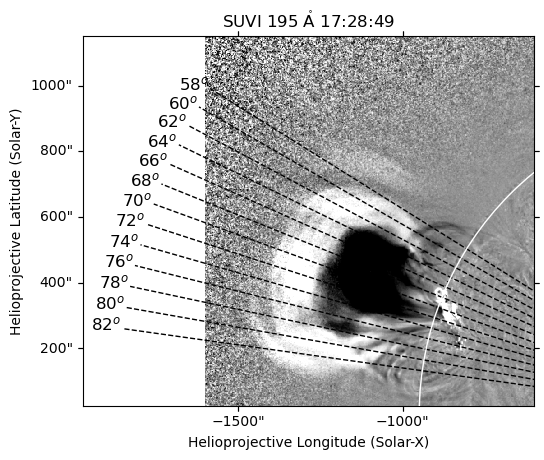

In [6]:
m = m_seq_runratio_195A[6]
m.plot_settings['norm'] = colors.Normalize(vmin=0.7, vmax=1.3)

fig = plt.figure()
ax  = fig.add_subplot(projection=m)
m.plot(axes=ax, cmap='Greys_r')
m.draw_limb()
ax.set_title(m.latex_name.replace('2024-05-14 ', ''))
ax.grid(False)

for value in centered_list:
    # rename the angles to be position angles, instead of geometric angles
    PA_value = value - 90
    
    line = myfuncs.plot_line(angle_deg=value, length=1870, map_obj=m)
    ax.plot_coord(line, c='k', lw=1, ls='--')
    
    # Plot the number at the end of the line
    # Convert SkyCoord to pixel coordinates for plotting text
    line_lon, line_lat = line.Tx, line.Ty
    end_point_pixel = m.world_to_pixel(SkyCoord(line_lon[1], line_lat[1],
                                                       frame=m.coordinate_frame))
    
    # Display the number at the end point
    ax.text(end_point_pixel.x.value - 20, end_point_pixel.y.value + 5, f'{PA_value}$^o$',
            color='k', fontsize=12, ha='center', va='center')

ax.set_xlim(left=-150, right=400)
ax.set_ylim(bottom=650, top=1100)
fig.tight_layout()
plt.show()

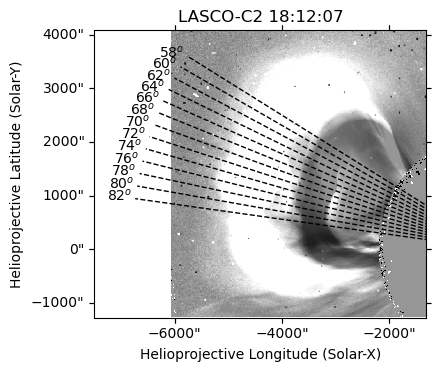

In [13]:
m = m_seq_runratio_c2[3]

fig = plt.figure(figsize=[7,7])
ax  = fig.add_subplot(projection=m)
img = m.plot(axes=ax)
m.draw_limb()
ax.grid(False)
ax.set_title(m.latex_name.replace('Orange white-light 2024-05-14 ', ''))

for value in centered_list:
    line = myfuncs.plot_line(angle_deg=value, length=6800, map_obj=m)
    ax.plot_coord(line, c='k', lw=1, ls='--')
    
    # Plot the number at the end of the line
    # Convert SkyCoord to pixel coordinates for plotting text
    line_lon, line_lat = line.Tx, line.Ty
    end_point_pixel = m.world_to_pixel(SkyCoord(line_lon[1], line_lat[1], frame=m.coordinate_frame))

    # rename the angles to be position angles, instead of geometric angles
    PA_value = value - 90
    # Display the number at the end point
    ax.text(end_point_pixel.x.value - 25, end_point_pixel.y.value + 5, f'{PA_value}$^o$',
            color='k', fontsize=10, ha='center', va='center')

ax.set_xlim(left=-120, right=400)
ax.set_ylim(bottom=400, top=850)
fig.tight_layout()
plt.show()

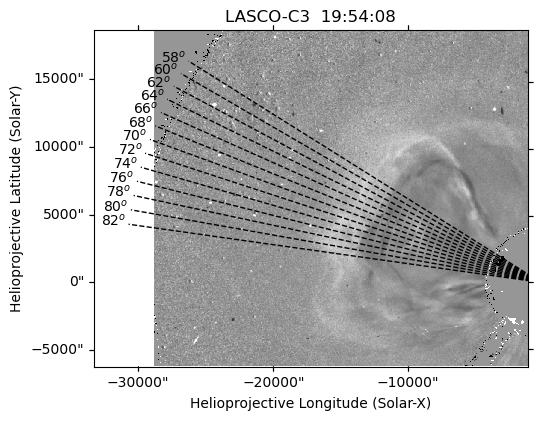

In [16]:
m = m_seq_runratio_c3[10]

fig = plt.figure(figsize=[7,7])
ax  = fig.add_subplot(projection=m)
img = m.plot(axes=ax)
m.draw_limb()
ax.grid(False)
ax.set_title(m.latex_name.replace('Clear white-light 2024-05-14', ''))

for value in centered_list:
    line = myfuncs.plot_line(angle_deg=value, length=31000, map_obj=m)
    ax.plot_coord(line, c='k', lw=1, ls='--')
    
    # Plot the number at the end of the line
    # Convert SkyCoord to pixel coordinates for plotting text
    line_lon, line_lat = line.Tx, line.Ty
    end_point_pixel = m.world_to_pixel(SkyCoord(line_lon[1], line_lat[1], frame=m.coordinate_frame))

    # rename the angles to be position angles, instead of geometric angles
    PA_value = value - 90
    # Display the number at the end point
    ax.text(end_point_pixel.x.value - 20, end_point_pixel.y.value + 5, f'{PA_value}$^o$',
            color='k', fontsize=10, ha='center', va='center')

ax.set_xlim(left=-80, right=500)
ax.set_ylim(bottom=420, top=870)
fig.tight_layout()
plt.show()

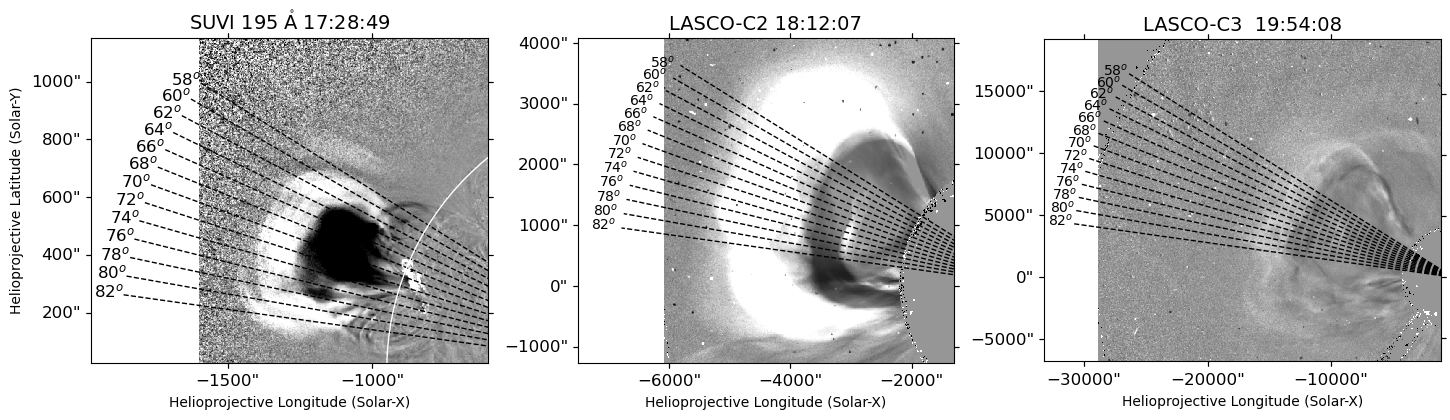

In [44]:
plt.rcParams.update({
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

fig = plt.figure(figsize=[15,10])


m = m_seq_runratio_195A[6]
m.plot_settings['norm'] = colors.Normalize(vmin=0.7, vmax=1.3)
ax  = fig.add_subplot(131, projection=m)
m.plot(axes=ax, cmap='Greys_r')
m.draw_limb()
ax.set_title(m.latex_name.replace('2024-05-14 ', ''))
ax.grid(False)
for value in centered_list:
    # rename the angles to be position angles, instead of geometric angles
    PA_value = value - 90
    line = myfuncs.plot_line(angle_deg=value, length=1880, map_obj=m)
    ax.plot_coord(line, c='k', lw=1, ls='--')
    # Convert SkyCoord to pixel coordinates for plotting text
    line_lon, line_lat = line.Tx, line.Ty
    end_point_pixel = m.world_to_pixel(SkyCoord(line_lon[1], line_lat[1], frame=m.coordinate_frame))
    # Display the number at the end point
    ax.text(end_point_pixel.x.value - 20, end_point_pixel.y.value + 5, f'{PA_value}$^o$',
            color='k', fontsize=12, ha='center', va='center')
ax.set_xlim(left=-150, right=400)
ax.set_ylim(bottom=650, top=1100)


m = m_seq_runratio_c2[3]
ax  = fig.add_subplot(132, projection=m)
m.plot(axes=ax)
m.draw_limb()
ax.grid(False)
ax.set_title(m.latex_name.replace('Orange white-light 2024-05-14 ', ''))
for value in centered_list:
    line = myfuncs.plot_line(angle_deg=value, length=6850, map_obj=m)
    ax.plot_coord(line, c='k', lw=1, ls='--')
    # Convert SkyCoord to pixel coordinates for plotting text
    line_lon, line_lat = line.Tx, line.Ty
    end_point_pixel = m.world_to_pixel(SkyCoord(line_lon[1], line_lat[1], frame=m.coordinate_frame))
    # rename the angles to be position angles, instead of geometric angles
    PA_value = value - 90
    # Display the number at the end point
    ax.text(end_point_pixel.x.value - 25, end_point_pixel.y.value + 5, f'{PA_value}$^o$',
            color='k', fontsize=10, ha='center', va='center')
ax.set_xlim(left=-120, right=400)
ax.set_ylim(bottom=400, top=850)
ax.set_ylabel(' ')


m   = m_seq_runratio_c3[10]
ax  = fig.add_subplot(133, projection=m)
m.plot(axes=ax)
m.draw_limb()
ax.grid(False)
ax.set_title(m.latex_name.replace('Clear white-light 2024-05-14', ''))
for value in centered_list:
    line = myfuncs.plot_line(angle_deg=value, length=31100, map_obj=m)
    ax.plot_coord(line, c='k', lw=1, ls='--')
    # Convert SkyCoord to pixel coordinates for plotting text
    line_lon, line_lat = line.Tx, line.Ty
    end_point_pixel = m.world_to_pixel(SkyCoord(line_lon[1], line_lat[1], frame=m.coordinate_frame))
    # rename the angles to be position angles, instead of geometric angles
    PA_value = value - 90
    # Display the number at the end point
    ax.text(end_point_pixel.x.value - 20, end_point_pixel.y.value + 5, f'{PA_value}$^o$',
            color='k', fontsize=10, ha='center', va='center')
ax.set_xlim(left=-80, right=500)
ax.set_ylim(bottom=410, top=880)
ax.set_ylabel(' ')


# Enforce identical axis sizes
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.9, wspace=0.2)

# Manually align panels
pos1 = fig.axes[0].get_position()
for ax in fig.axes[1:]:
    ax.set_position([ax.get_position().x0, pos1.y0,
                     ax.get_position().width, pos1.height])


fig.savefig(f'{data_dir}/SLITS_SUVI_195A_LASCO_C2_C3.pdf', format='pdf', bbox_inches='tight')
plt.show()